### Advanced Algorithm and Graph Mining Exam
#### Part II - Pandas
I'm Lorenzo Pisaneschi, I'm 25 years old, and I am from Pistoia, Tuscany, Italy.
I achieve my Bachelor degree in Computer Engineering at University of Study
of Florence (UNIFI) with a thesis on "An application of NeuroGPS on light sheet
microscopic images".

In this Jupyter Notebook, COVID-19 data (from regions and provinces
in Italy) are analyzed to visualize some useful information about the
pandemic which has upset the world. This work has been realized on
Ubuntu 19.10 with the PyCharm IDE. This data inspection is powered by
Pandas and Matplotlib.

More info are available at this
[GItHub Repo](https://github.com/pisalore/AAGM_exam "AAGM exam GitHUb repository")

Load data about COVID-19 pandemic in Italy, focusing on the provincial
and regional ones. Data are provided in JSON format, ready to be analyzed.

In [46]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from IPython.display import display

with open('dpc-covid19-ita-province.json') as json_provinces_data:
        provinces_data = json.load(json_provinces_data)
with open('dpc-covid19-ita-regioni.json') as json_regions_data:
        regions_data = json.load(json_regions_data)

##### Regions data
Here is displayed a table with all the Italian Regions COVID-19 data.
Results are grouped for date.

In [47]:
pd.options.display.max_rows = 100
dF_regions = pd.read_json(r'dpc-covid19-ita-regioni.json')
display(dF_regions)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,,
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,,
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,,
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2020-06-22T17:00:00,ITA,9,Toscana,43.769231,11.255889,18,9,27,333,360,-5,1,8752,1099,10211,313455,218271.0,,
2516,2020-06-22T17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,0,0,0,53,53,0,1,3945,466,4464,112483,58794.0,,
2517,2020-06-22T17:00:00,ITA,10,Umbria,43.106758,12.388247,4,1,5,8,13,-2,0,1347,78,1438,88714,61375.0,,
2518,2020-06-22T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,4,0,4,1,5,0,0,1042,146,1193,18239,13294.0,,


##### Provinces data
Here is displayed a table with all the Italian Provinces COVID-19 data.
Results are grouped for date.

In [48]:
dF_provinces = pd.read_json(r'dpc-covid19-ita-province.json')
display(dF_provinces)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,2020-06-22T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2669,,
15356,2020-06-22T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2680,,
15357,2020-06-22T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,5121,,
15358,2020-06-22T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2858,,


#### Overall Plots
In this section general data visualization are provided: totals
(total COVID-19 cases, recovered and deaths, in Italy) are shown below.

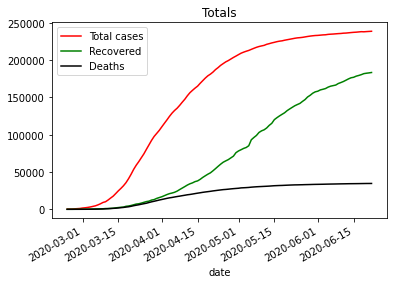

In [49]:
dates, total_cases, recovered, deaths = [], [], [], []

for date_group in dF_regions.groupby(['data']):
    total_cases.append(date_group[1]['totale_casi'].sum())
    recovered.append(date_group[1]['dimessi_guariti'].sum())
    deaths.append(date_group[1]['deceduti'].sum())
    dates.append(date_group[0].split('T')[0])

x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

fig, ax = plt.subplots()
plt.plot(x_dates, total_cases, label='Total cases', color="red")
plt.plot(x_dates, recovered, label='Recovered', color="green")
plt.plot(x_dates, deaths, label='Deaths', color="black")
ax.set(xlabel='date',title='Totals')
plt.legend(loc="upper left")
fig.savefig("totals_regional.png")
plt.gcf().autofmt_xdate()
plt.show()


